In [1]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [2]:
def plot_confusion_matrix(y_true, y_pred):
    plt.figure(figsize=(5,4))
    cm = confusion_matrix(y_true, y_pred, labels=[1, 0])
    print cm
    cm_df = pd.DataFrame(cm, index=[1, 0], columns=[1, 0])
    ax = sns.heatmap(cm_df, annot=True, fmt = "d", cmap=plt.cm.Blues)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title('Confusion matrix')
    plt.show()

In [3]:
musicbox_conn = sql.connect("../data/musicbox.sqlite")
musicbox_conn.text_factory = str

In [4]:
churn_df = pd.read_sql("SELECT * FROM churn", musicbox_conn)

In [5]:
churn_df.head(10)

,uid,device,freq_w1,play_time_w1,avg_play_pct_w1,freq_w2,play_time_w2,avg_play_pct_w2,freq_w3,play_time_w3,avg_play_pct_w3,freq_w4,play_time_w4,avg_play_pct_w4
0,0,ar,145338.0,1.251728e+10,0.695687,406719.0,1.750280e+10,0.590655,315694.0,2.000722e+10,0.682264,258804.0,2.123130e+10,0.711662
1,12333,ip,45.0,9.027000e+03,0.949343,114.0,2.437200e+04,0.900190,109.0,2.479000e+04,0.972819,75.0,1.462400e+04,0.931983
2,36816,ar,4.0,1.846110e+05,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,51923,ar,NaN,NaN,NaN,2.0,1.020000e+02,0.325743,NaN,NaN,NaN,NaN,NaN,NaN
4,60183,ar,354.0,1.354700e+04,0.148254,283.0,1.478100e+04,0.202751,333.0,1.539700e+04,0.179196,38.0,4.949000e+03,0.508749
5,62099,ar,13.0,7.800000e+02,0.239631,NaN,NaN,NaN,10.0,1.665000e+03,0.616586,NaN,NaN,NaN
6,103928,ar,2.0,2.360000e+02,0.459144,13.0,4.490000e+02,0.125180,2.0,1.060000e+02,0.192727,2.0,2.800000e+01,0.046512
7,104057,ar,NaN,NaN,NaN,216.0,2.392600e+04,0.607737,NaN,NaN,NaN,129.0,1.808900e+04,0.549439
8,126721,ar,137.0,1.470600e+04,0.437840,709.0,1.090790e+05,0.602994,575.0,9.842600e+04,0.688172,247.0,3.242800e+04,0.515144
9,150921,ar,46.0,1.145900e+04,0.995913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
churn_df.shape

(594252, 14)

In [7]:
churn_df = churn_df[~(churn_df.freq_w1.isnull() & churn_df.freq_w2.isnull() & churn_df.freq_w3.isnull())]

In [8]:
churn_df.shape

(583962, 14)

In [9]:
churn_df.describe()

,uid,freq_w1,play_time_w1,avg_play_pct_w1,freq_w2,play_time_w2,avg_play_pct_w2,freq_w3,play_time_w3,avg_play_pct_w3,freq_w4,play_time_w4,avg_play_pct_w4
count,5.839620e+05,5.370930e+05,5.370380e+05,537038.000000,2.733970e+05,2.733730e+05,273373.000000,2.349440e+05,2.349270e+05,234927.000000,1.964330e+05,1.964230e+05,196423.000000
mean,1.673784e+08,9.534328e+01,2.949101e+07,0.553899,1.245757e+02,1.384356e+07,0.586528,1.362943e+02,4.045263e+07,0.586726,1.417671e+02,1.949876e+07,0.591718
std,1.043860e+07,4.302067e+03,2.036344e+10,0.279140,5.168211e+03,5.830368e+09,0.263926,6.321681e+03,1.859682e+10,0.261094,6.126802e+03,6.845284e+09,0.257849
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,1.000000e+00,0.000000e+00,0.000000,1.000000e+00,0.000000e+00,0.000000,1.000000e+00,0.000000e+00,0.000000
25%,1.680325e+08,6.000000e+00,5.000000e+02,0.338013,9.000000e+00,9.530000e+02,0.392200,9.000000e+00,9.680000e+02,0.393572,1.000000e+01,1.082000e+03,0.402257
50%,1.684889e+08,2.400000e+01,2.818000e+03,0.572994,3.600000e+01,4.627000e+03,0.614804,3.600000e+01,4.587000e+03,0.613440,3.700000e+01,4.826000e+03,0.619924
75%,1.687722e+08,8.100000e+01,1.128787e+04,0.785403,1.080000e+02,1.687800e+04,0.808028,1.090000e+02,1.641350e+04,0.805434,1.140000e+02,1.733300e+04,0.805400
max,1.692623e+08,1.894181e+06,1.491651e+13,1.000000,1.782169e+06,3.020395e+12,1.000000,1.898765e+06,9.007906e+12,1.000000,1.759944e+06,2.994757e+12,1.000000


In [10]:
churn_df.fillna(0, inplace=True)

In [11]:
feature_ls = ['freq_w1', 'play_time_w1', 'avg_play_pct_w1', \
              'freq_w2', 'play_time_w2', 'avg_play_pct_w2', \
              'freq_w3', 'play_time_w3', 'avg_play_pct_w3', 'device']

In [12]:
X = churn_df[feature_ls]

In [13]:
X['device'] = (X['device'] == 'ip').astype(int)
y = (churn_df.freq_w4 == 0).astype(int)

/Users/Meng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
y.mean()

0.663620235563273

In [15]:
RANDOM_SEED = 24
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = RANDOM_SEED
)

### random forest

In [16]:
%%time
clf_rf = RandomForestClassifier(max_depth=None, n_estimators=100, min_samples_leaf=3, random_state=RANDOM_SEED)
clf_rf.fit(X_train, y_train)

CPU times: user 2min 43s, sys: 2.91 s, total: 2min 46s
Wall time: 2min 52s


In [142]:
print clf_rf.score(X_train, y_train)
print clf_rf.score(X_test, y_test)

0.937158276109
0.839676007055


In [17]:
print classification_report(y_test, clf_rf.predict(X_test))

             precision    recall  f1-score   support

          0       0.77      0.74      0.75     39271
          1       0.87      0.89      0.88     77522

avg / total       0.84      0.84      0.84    116793



[[69123  8399]
 [10365 28906]]


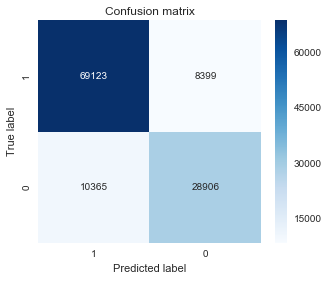

In [18]:
plot_confusion_matrix(y_test, clf_rf.predict(X_test))

In [19]:
df_fi = pd.DataFrame(zip(feature_ls, clf_rf.feature_importances_), columns=['feature', 'feature_importance'])
df_fi.sort_values('feature_importance', ascending=False, inplace=True)

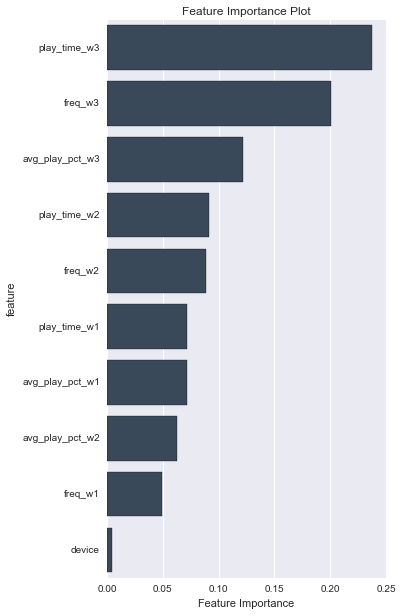

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches((5, 10))
sns.barplot(x='feature_importance', y='feature', data=df_fi, color="#34495e", ax=ax)
ax.set(xlabel='Feature Importance', ylabel='feature', title='Feature Importance Plot')
plt.show()

### logistic regression

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
print clf_lr.score(X_train_scaled, y_train)
print clf_lr.score(X_test_scaled, y_test)

0.8135000396
0.812771313349


In [26]:
print classification_report(y_test, clf_lr.predict(X_test_scaled))

             precision    recall  f1-score   support

          0       0.76      0.64      0.70     39271
          1       0.83      0.90      0.86     77522

avg / total       0.81      0.81      0.81    116793



[[69608  7914]
 [13953 25318]]


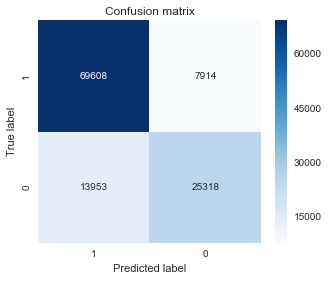

In [27]:
plot_confusion_matrix(y_test, clf_lr.predict(X_test_scaled))

In [28]:
df_coeffs = pd.DataFrame({'feature': feature_ls, 'coeff': clf_lr.coef_.flatten()})
df_coeffs.sort_values('coeff', inplace=True)

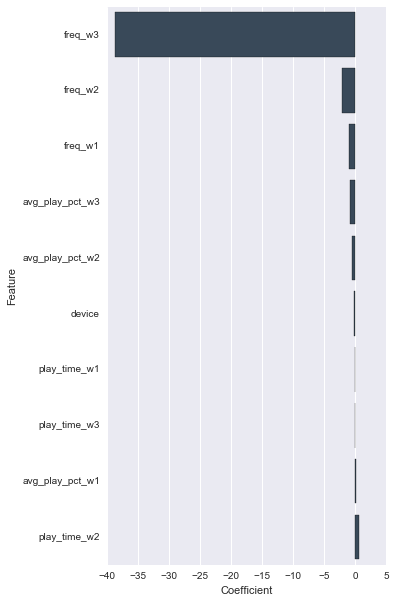

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches((5, 10))
sns.barplot(x='coeff', y='feature', data=df_coeffs, color="#34495e", ax=ax)
ax.set(xlabel='Coefficient', ylabel='Feature')
plt.show()

## ROC

In [30]:
y_test_pred_proba_lr = clf_lr.predict_proba(X_test_scaled)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_test_pred_proba_lr)

/Users/Meng/anaconda/lib/python2.7/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [31]:
y_test_pred_proba_rf = clf_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_test_pred_proba_rf)

In [32]:
print roc_auc_score(y_test, y_test_pred_proba_rf)
print roc_auc_score(y_test, y_test_pred_proba_lr)

0.895169648601
0.87516954833


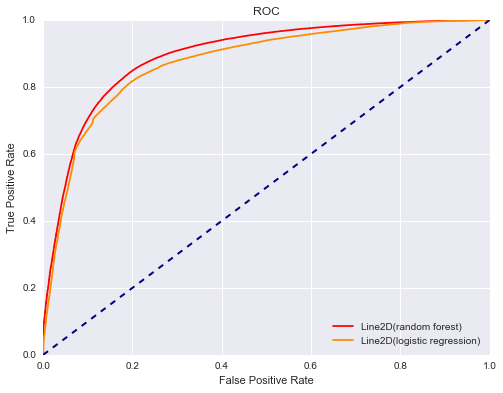

In [33]:
# plot TPR against FPR
plt.figure(figsize=(8, 6))
p1, = plt.plot(fpr_rf, tpr_rf, color='red', label='random forest')
p2, = plt.plot(fpr_lr, tpr_lr, color='darkorange', label='logistic regression')

# plot 45 degree line
xx = np.linspace(0, 1.0, 20)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")

plt.legend([p1, p2], loc=4)

plt.show()